In [199]:
import tensorflow as tf
import numpy as np
import pandas as pd

from pathlib import Path

import cv2 as cv
from PIL import Image

from tqdm.notebook import tqdm
import imutils

In [21]:
import tensorflow.keras as K

In [22]:
# сформируем функцию для показа картинки, так будет удобнее
def show_img(img, resize=(512, 512)):
    # переводим тип массива в unsigned int 8
    # этот тип может представлять числа в диапазоне (0, 255), 
    # поэтому он идеален для представления картинок
    img = img.astype("uint8")
    
    # если понадобится, то можем изменить размер картинки
    if resize:
        img = cv.resize(img, resize)

    # составляем картинку из массива и возвращаем её
    # если вызвать эту функции в конце ячейки, то изображении автоматически покажется в ноутбуке
    return Image.fromarray(img)

In [157]:
path_bears = r"all_bears/arctic_with_bears/bears"
path_masks = r"all_bears/arctic_with_bears/masks"


In [158]:
num = 12

img = cv.imread(path_bears + f"/{num}.JPG")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)

img_mask = cv.imread(path_masks + f"/{num}.png")
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

(1410, 2116, 3)


In [169]:
masks = np.zeros((3, 256, 256, 3), dtype="uint8")

In [189]:
mask.shape

(255, 255)

In [188]:
masks[0] = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

ValueError: could not broadcast input array from shape (255,255,3) into shape (256,256,3)

In [ ]:
np.unique(cv.cvtColor(img_mask, cv.COLOR_GRAY2BGR))

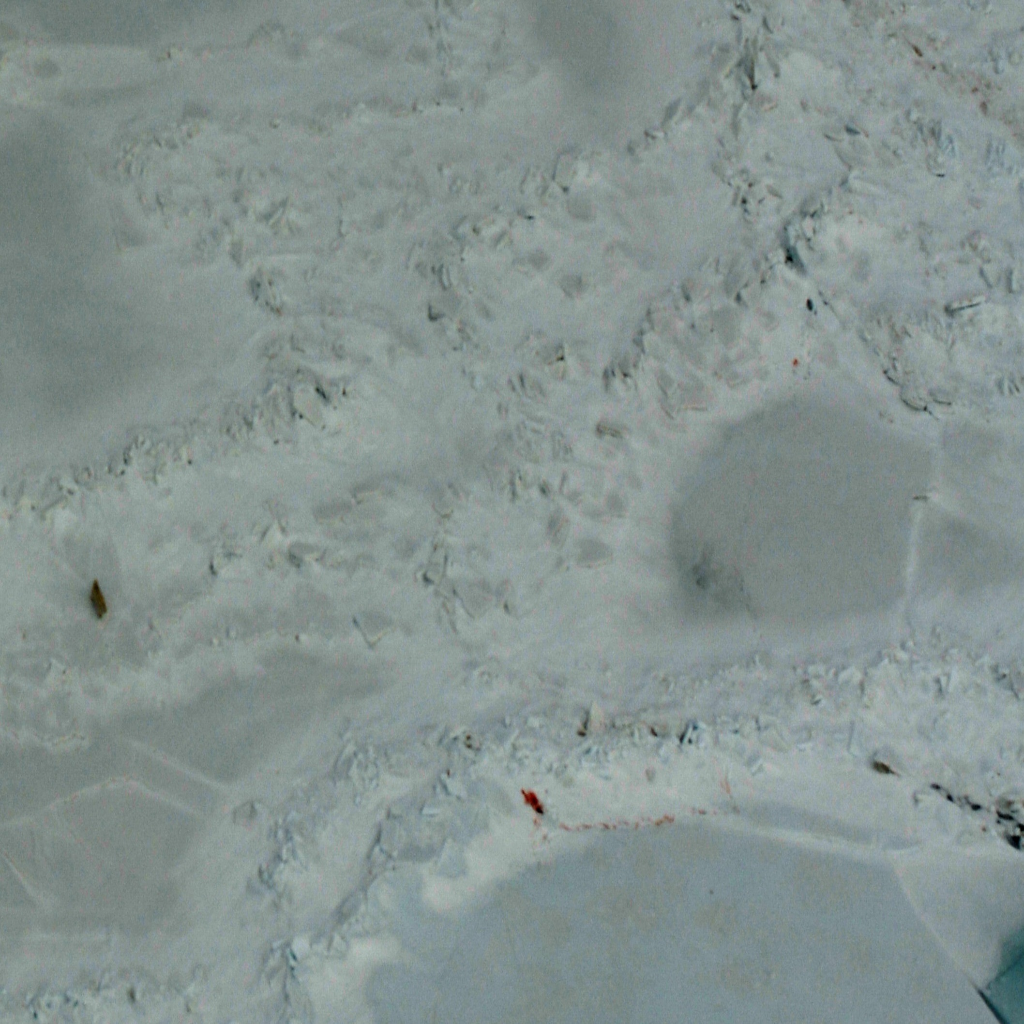

In [25]:
show_img(img, (1024, 1024))

In [129]:
def sliding_window(image, image_mask, windowSize=256, stepSize=128, treshold=0.8):
	target = image_mask.sum() * treshold
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			is_bear = image_mask[y:y + windowSize, x:x + windowSize].sum() > target
			# yield the current window
			yield (is_bear, image[y:y + windowSize, x:x + windowSize], image_mask[y:y + windowSize, x:x + windowSize])

In [135]:
windowSize = 256
step = windowSize // 2

total_imgs = len(range(0, img.shape[0], step)) * len(range(0, img.shape[1], step))

labels = np.zeros(total_imgs)
imgs = np.zeros((total_imgs, windowSize, windowSize, 3))
masks = np.zeros((total_imgs, windowSize, windowSize))

for i, (label, window_img, window_mask) in enumerate(sliding_window(img, img_mask, windowSize, step)):
    labels[i] = label
    
    if window_img.shape[0] != windowSize or window_img.shape[1] != windowSize:
        imgs[i] = np.zeros((windowSize, windowSize, 3))
        masks[i] = np.zeros((windowSize, windowSize))
        
        imgs[i][:window_img.shape[0], :window_img.shape[1]] = window_img
        masks[i][:window_img.shape[0], :window_img.shape[1]] = window_mask

        continue

    imgs[i] = window_img
    masks[i] = window_mask


# labels = np.array(labels)
# imgs = np.array(imgs)

# bears_img = [i[1] for i in sliding_window(img, img_mask) if i[0]]

ValueError: could not broadcast input array from shape (256,256) into shape (256,128)

In [134]:
labels

array([0.])

In [133]:
show_img(imgs[np.where(labels)][0])

IndexError: index 0 is out of bounds for axis 0 with size 0

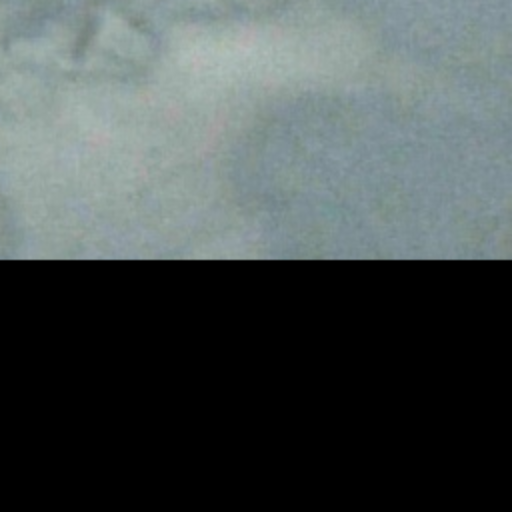

In [29]:
show_img(imgs[np.random.randint(imgs.shape[0])])

In [120]:
def split_img(img, img_mask, windowSize=256):
    # windowSize = 256
    step = windowSize // 2

    total_imgs = len(range(0, img.shape[0], step)) * len(range(0, img.shape[1], step))

    labels = np.zeros(total_imgs)
    imgs = np.zeros((total_imgs, windowSize, windowSize, 3), dtype="uint8")
    masks = np.zeros((total_imgs, windowSize, windowSize, 3), dtype="uint8")


    for i, (label, window_img, window_mask) in enumerate(sliding_window(img, img_mask, windowSize, step)):
        labels[i] = label
        
        if window_img.shape[0] != windowSize or window_img.shape[1] != windowSize:
            imgs[i] = np.zeros((windowSize, windowSize, 3))
            masks[i] = np.zeros((windowSize, windowSize, 3))
            
            imgs[i][:window_img.shape[0], :window_img.shape[1]] = window_img
            masks[i][:window_img.shape[0], :window_img.shape[1]] = cv.cvtColor(window_mask, cv.COLOR_GRAY2BGR)

            continue

        imgs[i] = window_img
        masks[i] = cv.cvtColor(window_mask, cv.COLOR_GRAY2BGR)

    
    return imgs, labels, masks

In [91]:
img = cv.imread(path_bears + f"/{24}.JPG")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)

img_mask = cv.imread(path_masks + f"/{24}.png")
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

(2848, 4288, 3)


In [240]:
def rot(img, seed=0, fill=False):
    if seed:
        global img_that_dont_frc_work
        img_that_dont_frc_work = img.copy()

        if fill:
            print("before rot", np.unique(img))
            print("rot", np.unique(imutils.rotate(img, 20 * np.random.randint(-20, 20))))
        
            return imutils.rotate(img, 20 * np.random.randint(-20, 20))
            # return tf.keras.layers.RandomRotation(.2, seed=seed, fill_mode="constant", fill_value=0.)(img)

        return tf.keras.layers.RandomRotation(.2, seed=seed)(img)

    if fill:
        print("before rot", np.unique(img))
        print("rot", np.unique(imutils.rotate(img, 20 * np.random.randint(-20, 20))))
        return imutils.rotate(img, 20 * np.random.randint(-20, 20))
        # return tf.keras.layers.RandomRotation(.2, seed=seed, fill_mode="constant", fill_value=0.)(img)

    return tf.keras.layers.RandomRotation(.2)(img)

In [95]:
imgs, labels, masks = split_img(img, img_mask)

In [96]:
img = imgs[np.where(labels)][0]

In [249]:
file_num_bears = 0
file_num_masks = 0
file_num_artic = 0

file_types = ["bears", "artic_cut", "masks"]

def save(img, type=0):
    global file_num_bears, file_num_masks, file_num_artic
    if type == 0:
        dir = file_types[type]
        cv.imwrite(f"made_datasets\hypothesis1_256\{dir}\{(file_num_bears)}.png", cv.cvtColor(img, cv.COLOR_RGB2BGR))
        file_num_bears += 1

        return
    
    if type == 1:
        dir = file_types[type]
        cv.imwrite(f"made_datasets\hypothesis1_256\{dir}\{(file_num_artic)}.png", cv.cvtColor(img, cv.COLOR_RGB2BGR))
        file_num_artic += 1

        return

    dir = file_types[type]
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    cv.imwrite(f"made_datasets\hypothesis1_256\{dir}\{(file_num_masks)}.png", img)
    file_num_masks += 1

In [234]:
def heck_colors(img):
    img_change = tf.image.random_brightness(img, .2)
    img_change = tf.image.random_contrast(img_change, .4, 1)
    img_change = tf.image.random_hue(img_change, 0.05)
    img_change = tf.image.random_saturation(img_change, 0.8, 1)

    return img_change

# show_img(heck_colors(img).numpy())

In [237]:
def save_a_ton(img, mask):

    save(img)
    save(mask, 2)

    save(heck_colors(img).numpy())
    save(mask, 2)

    seed = np.random.randint(2**31)
    save(rot(img, seed).numpy())
    # print(np.unique(rot(mask, seed, 1)))
    save(rot(mask, seed, 1), 2)
    

    seed = np.random.randint(2**31)
    save(heck_colors(rot(img, seed)).numpy())
    save(rot(mask, seed, 1), 2)

    seed = np.random.randint(2**31)
    save(heck_colors(rot(img, seed)).numpy())
    save(rot(mask, seed, 1), 2)

    save(tf.image.flip_up_down(img).numpy())
    save(tf.image.flip_up_down(mask).numpy(), 2)

    save(heck_colors(tf.image.flip_up_down(img)).numpy())
    save(tf.image.flip_up_down(mask).numpy(), 2)

    save(tf.image.flip_left_right(img).numpy())
    save(tf.image.flip_left_right(mask).numpy(), 2)

    save(heck_colors(tf.image.flip_left_right(img)).numpy())
    save(tf.image.flip_left_right(mask).numpy(), 2)

In [242]:
def save_a_ton(img, mask):

    save(img)
    save(mask, 2)

    save(heck_colors(img).numpy())
    save(mask, 2)

    save(np.rot90(img))
    # print(np.unique(np.rot90(mask, , 1)))
    save(np.rot90(mask), 2)
    
    save(heck_colors(np.rot90(img)).numpy())
    save(np.rot90(mask), 2)

    
    save(heck_colors(np.rot90(img)).numpy())
    save(np.rot90(mask), 2)

    save(tf.image.flip_up_down(img).numpy())
    save(tf.image.flip_up_down(mask).numpy(), 2)

    save(heck_colors(tf.image.flip_up_down(img)).numpy())
    save(tf.image.flip_up_down(mask).numpy(), 2)

    save(tf.image.flip_left_right(img).numpy())
    save(tf.image.flip_left_right(mask).numpy(), 2)

    save(heck_colors(tf.image.flip_left_right(img)).numpy())
    save(tf.image.flip_left_right(mask).numpy(), 2)

In [252]:
file_num_bears = 0
file_num_masks = 0
file_num_artic = 0

# for num in tqdm(range(35)):
#     img = cv.imread(path_bears + f"/{num}.JPG")
#     img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#     img_mask = cv.imread(path_masks + f"/{num}.png")
#     img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

#     imgs, labels, masks = split_img(img, img_mask, 800)
#     labels = labels.astype(bool)

#     for img, mask in zip(imgs[np.where(labels)], masks[np.where(labels)]):
#         save_a_ton(img, mask)

for num in tqdm(range(35)):
    img = cv.imread(path_bears + f"/{num}.JPG")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img_mask = cv.imread(path_masks + f"/{num}.png")
    img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

    imgs, labels, masks = split_img(img, img_mask, 800)
    labels = labels.astype(bool)

    for img in imgs[np.where(~labels)]:
        save(img, 0)

    # for i in range(imgs.shape[0]):
    #     if labels[i]:
    #         save_a_ton(imgs[i])

    #     else:
    #         save(imgs[i], 0)

  0%|          | 0/35 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [117]:
rot(img_that_dont_frc_work, 1, 0)

InvalidArgumentError: Exception encountered when calling layer "random_rotation_11" (type RandomRotation).

slice index -1 of dimension 0 out of bounds. [Op:StridedSlice] name: random_rotation_11/strided_slice/

Call arguments received by layer "random_rotation_11" (type RandomRotation):
  • inputs=tf.Tensor(shape=(256, 256), dtype=uint8)
  • training=True

In [10]:
chosen = np.random.choice(52331, 1115, replace=True)

In [12]:
import shutil

for i in range(1115):
    shutil.copy(f"made_datasets/hypothesis1_256/artic/{chosen[i]}.png", f"made_datasets/hypothesis1_256/artic_cut/{i}.png")

In [13]:
import os
os.rename("made_datasets/hypothesis1_256/artic", "made_datasets/artic")

In [139]:
img

In [140]:
r"hackaton_msk/made_datasets/hypothesis1_256/cropped_bears_dataset/bears/" + f"/{num}.png"

'hackaton_msk/made_datasets/hypothesis1_256/cropped_bears_dataset/bears//0.png'

In [ ]:
for num in tqdm(range(500)):
    img = cv.imread(r"made_datasets/hypothesis1_256/cropped_bears_dataset/bears/" + f"/{num}.png")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img_mask = cv.imread(r"made_datasets/hypothesis1_256/cropped_bears_dataset/masks/" + f"/{num}.png")
    img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

    # instances are encoded as different colors
    obj_ids = np.unique(img_mask)
    # first id is the background, so remove it
    obj_ids = obj_ids[1:]

    # get bounding box coordinates for each mask
    num_objs = len(obj_ids)
    boxes = []
    for i in range(num_objs):
        masks = img_mask == obj_ids[i]

        pos = np.where(masks)
        xmin = np.min(pos[1])
        xmax = np.max(pos[1])
        ymin = np.min(pos[0])
        ymax = np.max(pos[0])
        # if any([i % 1 != 0 for i in [xmin, ymin, xmax, ymax]]):
            # print(boxes)
        if xmin == xmax or ymin == ymax:
            print(num)

        boxes.append([xmin, ymin, xmax, ymax])

    print(num_objs, boxes)

In [147]:
num_objs

133

In [148]:
img_mask = cv.imread(r"made_datasets/hypothesis1_256/cropped_bears_dataset/masks/" + f"/{num}.png")
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

In [150]:
np.unique(img_mask)

array([  0,   1,   2,   3,   5,   8,   9,  10,  11,  13,  15,  19,  20,
        23,  24,  25,  26,  29,  31,  36,  43,  44,  45,  46,  47,  48,
        49,  50,  52,  53,  54,  55,  57,  62,  63,  65,  66,  67,  69,
        70,  71,  74,  76,  78,  79,  82,  85,  86,  91,  92,  94,  95,
        96,  97, 100, 109, 110, 114, 116, 117, 119, 120, 121, 125, 126,
       127, 128, 129, 130, 134, 135, 137, 138, 144, 145, 146, 149, 150,
       151, 154, 157, 161, 163, 168, 169, 170, 173, 174, 175, 178, 179,
       180, 184, 186, 187, 188, 189, 190, 191, 197, 200, 204, 207, 208,
       212, 213, 214, 216, 217, 218, 221, 222, 225, 226, 228, 230, 231,
       234, 236, 238, 239, 240, 241, 242, 243, 245, 246, 247, 249, 251,
       252, 253, 254, 255], dtype=uint8)

In [ ]:
num = 2

img = cv.imread(r"made_datasets/hypothesis1_256/cropped_bears_dataset/bears/" + f"/{num}.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_mask = cv.imread(r"made_datasets/hypothesis1_256/cropped_bears_dataset/masks/" + f"/{num}.png")
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

# instances are encoded as different colors
obj_ids = np.unique(img_mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# get bounding box coordinates for each mask
num_objs = len(obj_ids)
boxes = []
for i in range(num_objs):
    masks = img_mask == obj_ids[i]

    pos = np.where(masks)
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    # if any([i % 1 != 0 for i in [xmin, ymin, xmax, ymax]]):
        # print(boxes)
    if xmin == xmax or ymin == ymax:
        print(num)

    boxes.append([xmin, ymin, xmax, ymax])

print(num_objs, boxes)

In [266]:
def draw_bbox(img, bbox, color=(255, 0, 0), thickness=10):
    # img = img.copy()
    return cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), color=color, thickness=thickness)

In [264]:
img = cv.imread(path_bears + f"/{24}.JPG")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)

img_mask = cv.imread(path_masks + f"/{24}.png")
img_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

(2848, 4288, 3)


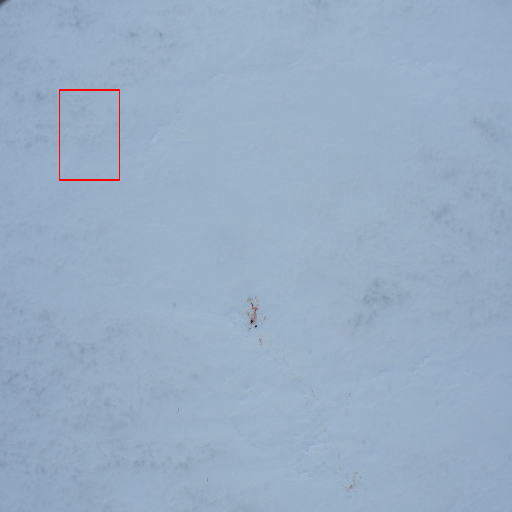

In [268]:
show_img(draw_bbox(img, (500, 500, 1000, 1000)))

In [269]:
import pickle

In [275]:
pickle.load(open("1.pickle", "rb"))

ModuleNotFoundError: No module named 'sahi'

In [280]:
with open("1.pickle", "rb") as f:
    unpickler = pickle.Unpickler(f)
    # if file is not empty scores will be equal
    # to the value unpickled
    scores = unpickler.load()

ModuleNotFoundError: No module named 'sahi'